In [1]:
import numpy as np
import theano
import theano.tensor as T
import os, pickle, gzip
from PIL import Image
import matplotlib.pyplot as plt

from theano import function
rng = np.random

In [2]:
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [4]:
class SimpleTwoLayer(object):
    
    n_in = 28 * 28
    n_hidden = 10000
    n_output = 10
        
    a = theano.shared(
        value=np.random.choice(
            [-1, 1],
            (n_hidden, n_output),
        ).astype(theano.config.floatX),
        name='a',
        borrow=True
    )

    def __init__(self, input):

        self.W = theano.shared(
            value=np.random.randn(
                self.n_in, self.n_hidden
            ).astype(theano.config.floatX),
            name='W',
            borrow=True
        )

        self.y_score = T.dot(T.nnet.relu(T.dot(input, self.W)), self.a) / np.sqrt(self.n_hidden)
        self.params = [self.W, self.a]
        self.input = input
        
    def cost(self, y):
        return T.sum((self.y_score - y)**2)

def train(sample_x, sample_y, learning_rate=0.001, n_epoches=10000):
    
    x = T.matrix('x')
    y = T.matrix('y')
    model = SimpleTwoLayer(input=x)
    cost = model.cost(y)
    g_W = T.grad(cost=cost, wrt=model.W)
    updates = [(model.W, model.W - g_W * learning_rate)]
    train_model = theano.function(
        inputs=[x, y],
        outputs=cost,
        updates=updates
    )

    epoch = 0
    while epoch < n_epoches:
        epoch = epoch + 1
        c = train_model(sample_x, sample_y)
        if epoch % 100 == 1:
            print(epoch, c)
    return model

In [7]:
def generate_sample(N=None):
    if N == None:
        N = len(train_set[0])
    indices = np.random.choice(len(train_set[0]), N, replace=False)
    x = train_set[0][indices]
    y = np.zeros((N, 10))
    for i in range(N):
        y[i, train_set[1][i]] = 1
    return x, y

In [8]:
x, y = generate_sample()

In [9]:
model=train(x, y)

1 27168097.35567627
101 50000.0
201 50000.0
301 50000.0
401 50000.0


KeyboardInterrupt: 

In [81]:
print(predict(model, test_x[:10]), test_y[:10])
print(predict(model, x[:10]), y[:10])

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.793  0.848  0.792 -0.808 -0.867  0.848  0.827 -0.813 -0.849 -0.847]
 [-0.048 -0.008 -0.053  0.008  0.011  0.034  0.053 -0.053  0.053  0.053]] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 

In [74]:
print(train_set[0].shape)

(50000, 784)


In [37]:
models = []
n_model = 50
for i in range(n_model):
    print(i)
    models.append(train(x.astype(np.float64), y.astype(np.float64), n_epoches=1000))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [80]:
def predict(model, test_x):
    predict_model = theano.function(
        inputs=[model.input],
        outputs=model.y_score
    )

    predicted_values = predict_model(test_x)
    return predicted_values


In [44]:
test_x, test_y = generate_sample(100)

errors = np.zeros((len(models), len(test_x), SimpleTwoLayer.n_output))
for i in range(len(models)):
    predicted_y = predict(models[i], test_x)
    errors[i] = predicted_y - test_y

In [45]:
errors = errors.reshape(len(models), -1)

In [59]:
print(predict(models[0], test_x[0:4]), test_y[0:4])

[[ 0.915 -0.278  0.23  -0.101  0.802  0.834  0.885  1.732  0.674 -0.535]
 [-2.289  1.6    1.21  -0.787  0.705 -2.148  0.571 -0.121  2.83   0.449]
 [ 0.874  1.791  1.893 -0.164  0.849 -2.052 -0.379 -1.284  1.119 -2.868]
 [-2.186  1.305  1.465  0.035 -1.149  0.706 -1.448  1.438  1.531  1.853]] [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [46]:
Corr = np.abs(np.corrcoef(errors))

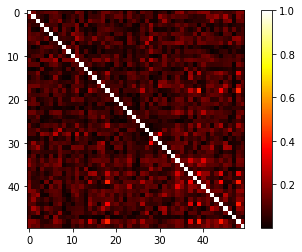

In [47]:
plt.imshow(Corr, cmap='hot')
plt.colorbar() 
plt.show()

In [48]:
dump_file = open('models_mnist', 'wb')
pickle.dump(models, dump_file)

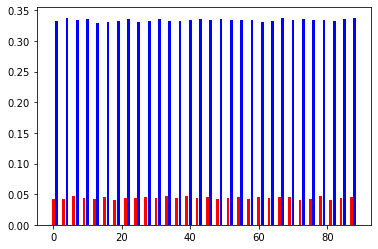

In [87]:
n_sample = 30
bias = np.abs(np.mean(errors, axis=1)[:n_sample])
std = np.std(errors, axis=1)[:n_sample]

x_val = []
y_val = []
col_val = []

for i in range(n_sample):
    x_val.append(i*3)
    x_val.append(i*3+1)
    y_val.append(bias[i])
    y_val.append(std[i])
    col_val.append('r')
    col_val.append('b')
    
plt.bar(x_val, y_val, color=col_val)
plt.show()

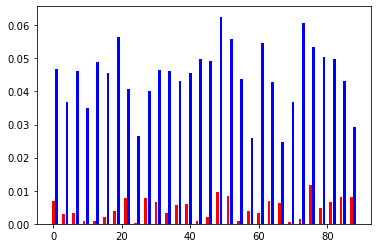

In [53]:
n_sample = 30
bias = np.abs(np.mean(errors, axis=1)[:n_sample])
std = np.std(errors, axis=1)[:n_sample]

x_val = []
y_val = []
col_val = []

for i in range(n_sample):
    x_val.append(i*3)
    x_val.append(i*3+1)
    y_val.append(bias[i])
    y_val.append(std[i])
    col_val.append('r')
    col_val.append('b')
    
plt.bar(x_val, y_val, color=col_val)
plt.show()

In [88]:
test_x[0], test_y[0], errors[0][0]

(array([-0.52130095,  0.14460828]), -0.07538443417869954, -0.25091970510517414)

In [27]:
def show_digit(image):
    img = Image.fromarray(np.uint8(image), 'L')
    img.show()